# Dynamic Programming

### BUSI520 - Python for Business Research
### Kerry Back, JGSB, Rice University

### Dynamic Programming

* action at each date
* reward (possibly) at each date depending on the action
* state variable that evolves depending on the action and that determines future possible rewards

### Example: Cake-Eating Problem

* cake (of size 100 in our example) that can be eaten at any time
* utility from eating cake
* state variable is the amount of cake left
* diminishing marginal utility, discount future utility

maximize
$\sum_{t=0}^\infty \delta^t u(c_t)$
subject to
$\sum_{t=0}^\infty c_t  \leq 100$

### Value Function

* maximum discounted future utility achievable starting from a given amount of cake $x$

$$V(x) = \max \sum_{t=0}^\infty \delta^t u(c_t)$$

* satisfies Bellman equation

$$V(x) = \max_c u(c) + \delta V(x-c)$$

### Value Iteration

* start with arbitrary guess $V_0$ for $V$, for example, $V_0(x)=0$ for all $x$.
* define $V_1(x) = \max_c u(c) + \delta V_0(x-c)$.
* define $V_2$ in terms of $V_1$ similarly, etc.
* this is a contraction map and converges to the true value function $V$.

In [17]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Parameters

We will use the example $u(c) = \sqrt{c}$.  In this case, the analytic optimal policy is
$$c^*(x) = (1-\delta^2)x.$$

We are going to find the value function on a grid.  A function on a finite grid is just an array of values.

In [18]:
u = np.sqrt
delta = 0.9    
state_grid = np.arange(101)

In [19]:
# map from one value array to the next one (V0 -> V1, etc.)
def iterate(value_grid):

    # interpolate to define V everywhere
    V = interp1d(state_grid, value_grid)

    # iteration
    def func(c, x):
        return - u(c) - delta * V(x-c)
    new_value_grid = []
    policy = []
    for x in state_grid:
        result = minimize(lambda c: func(c, x), x0=0, bounds=[(0, x)])
        new_value_grid.append(-result.fun)
        policy.append(result.x)

    return np.array(new_value_grid), np.array(policy)

In [20]:
# V0
value_grid = np.zeros(len(state_grid))

# iterate until convergence
err = 1
while err > 1.0e-6:
    new_value_grid, policy = iterate(value_grid)
    err = np.max(np.abs(value_grid-new_value_grid))
    value_grid = new_value_grid.copy()

C:\Users\kerry\AppData\Local\Temp\ipykernel_29924\4016024115.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(new_value_grid), np.array(policy)


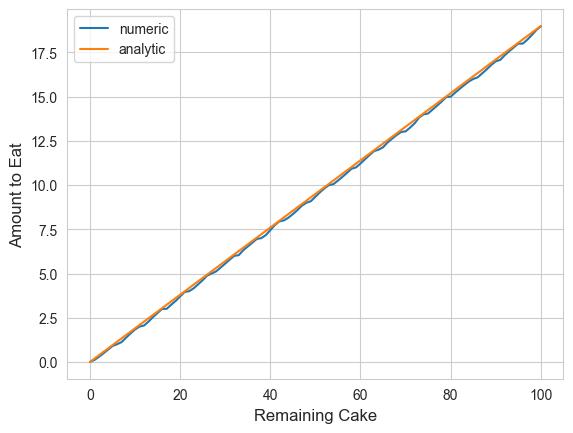

In [21]:
plt.plot(state_grid, policy, label="numeric")
plt.plot(state_grid, [(1-delta**2)*x for x in state_grid], label="analytic")  
plt.xlabel("Remaining Cake")
plt.ylabel("Amount to Eat")
plt.legend()
plt.show()